In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("/content/drive/MyDrive/IBM/Assignment - 2 /Churn_Modelling.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IBM/Assignment - 2 /Churn_Modelling.csv'

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


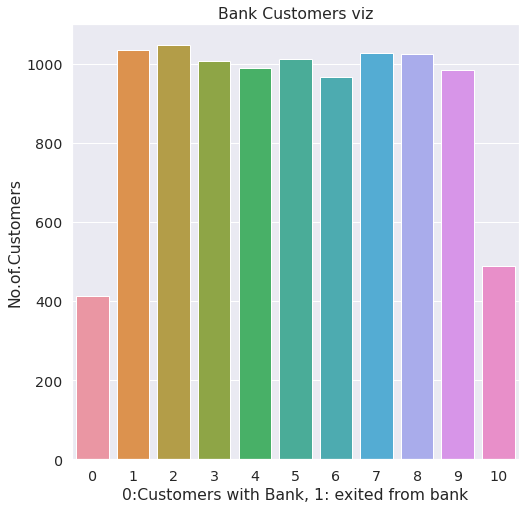

In [28]:
#Perform Univariate Analysis
plt.figure(figsize=(8,8))
sns.countplot(x='Tenure',data=df)
plt.xlabel('0:Customers with Bank, 1: exited from bank')
plt.ylabel('No.of.Customers')
plt.title("Bank Customers viz")
plt.show()

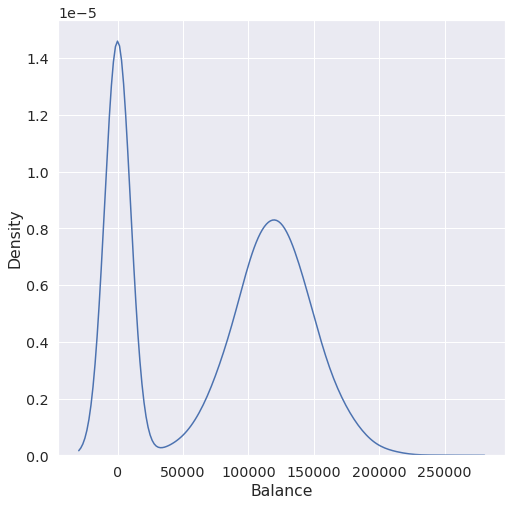

In [9]:
#Perform Univariate Analysis
plt.figure(figsize=(8,8))
sns.kdeplot(x=df['Balance'])

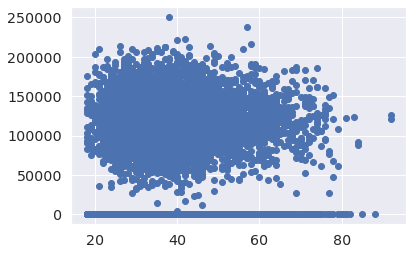

In [10]:
#Perform Bivariate Analysis 
plt.scatter(df.Age,df.Balance)

In [54]:
#Perform Bivariate Analysis
df.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Gender,0.007888,1.000000,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Age,-0.003965,0.022812,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.035943,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [36]:
#Perform Bivariate Analysis
import statsmodels.api as sm

#define response variable
y = df['CreditScore']

#define explanatory variable
x = df[['EstimatedSalary']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CreditScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01916
Date:                Sat, 24 Sep 2022   Prob (F-statistic):              0.890
Time:                        05:06:19   Log-Likelihood:                -59900.
No. Observations:               10000   AIC:                         1.198e+05
Df Residuals:                    9998   BIC:                         1.198e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             650.7617      1.940    3

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 288x288 with 0 Axes>

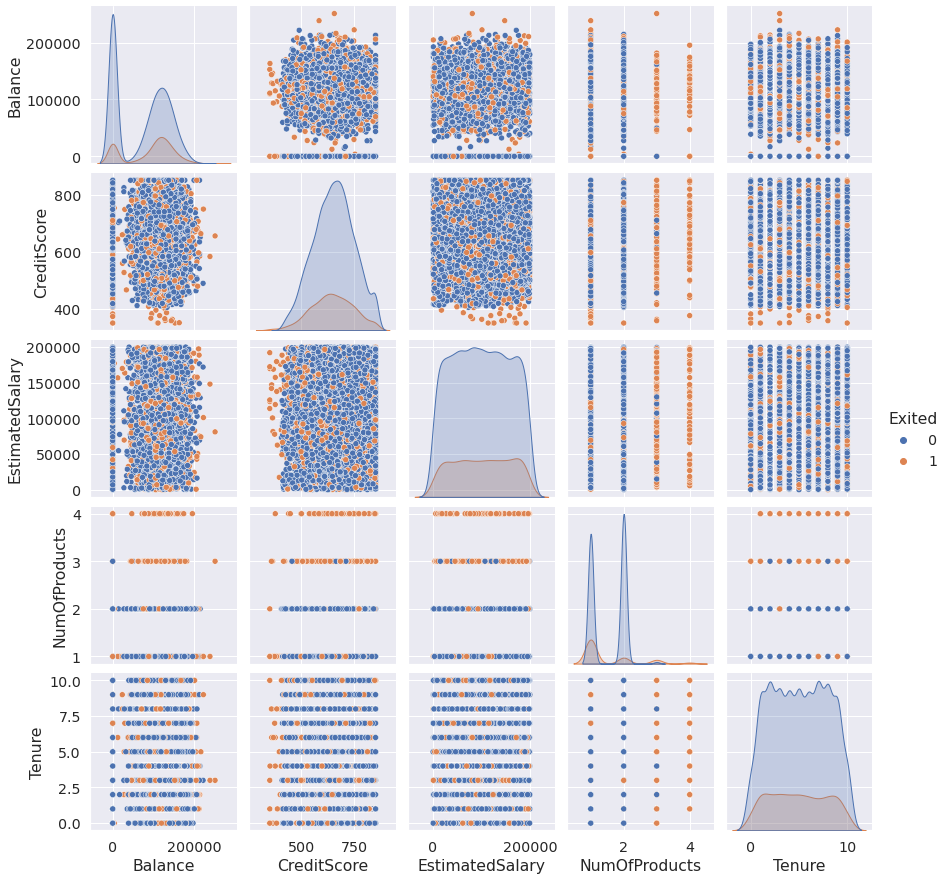

In [35]:
#Perform Multivariate Analysis
plt.figure(figsize=(4,4))
sns.pairplot(data=df[["Balance","CreditScore","EstimatedSalary","NumOfProducts","Tenure","Exited"]],hue="Exited")

In [40]:
#Perform Descriptive Statistics
df=pd.DataFrame(df)
print(df.sum())

CreditScore                                                  6505288
Geography          FranceSpainFranceFranceSpainSpainFranceGermany...
Gender             FemaleFemaleFemaleFemaleFemaleMaleMaleFemaleMa...
Age                                                           389218
Tenure                                                         50128
Balance                                                 764858892.88
NumOfProducts                                                  15302
HasCrCard                                                       7055
IsActiveMember                                                  5151
EstimatedSalary                                        1000902398.81
Exited                                                          2037
dtype: object


In [39]:
#Perform Descriptive Statistics
print("----Sum Value-----")
print(df.sum(1))
print("----------------------------------")
print("-----Product Value-----")
print(df.prod())
print("----------------------------------")

----Sum Value-----
0       102015.88
1       197002.44
2       274149.37
3        94567.63
4       205492.92
          ...    
9995     97088.64
9996    159633.38
9997     42840.58
9998    168784.83
9999    169159.57
Length: 10000, dtype: float64
----------------------------------
-----Product Value-----
CreditScore        0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    inf
Exited             0.0
dtype: float64
----------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [38]:
#Perform Descriptive Statistics
print("----------Mean Value-----------")
print(df.mean())
print("-------------------------------")
print("----------Median Value---------")
print(df.median())
print("-------------------------------")
print("----------Mode Value------------")
print(df.mode())
print("-------------------------------")

----------Mean Value-----------
CreditScore           650.528800
Age                    38.921800
Tenure                  5.012800
Balance             76485.889288
NumOfProducts           1.530200
HasCrCard               0.705500
IsActiveMember          0.515100
EstimatedSalary    100090.239881
Exited                  0.203700
dtype: float64
-------------------------------
----------Median Value---------
CreditScore           652.000
Age                    37.000
Tenure                  5.000
Balance             97198.540
NumOfProducts           1.000
HasCrCard               1.000
IsActiveMember          1.000
EstimatedSalary    100193.915
Exited                  0.000
dtype: float64
-------------------------------
----------Mode Value------------
   CreditScore Geography Gender  Age  Tenure  Balance  NumOfProducts  \
0          850    France   Male   37       2      0.0              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1         2492

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [41]:
#Handling with missing Values
df.isnull()#Checking values are null

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False


In [42]:
#Handling with missing Values
df.notnull()#Checking values are not null

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


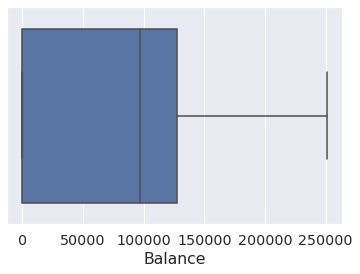

In [43]:
#Find outliers & replace the outliers
sns.boxplot(df['Balance'])

In [44]:
#Find outliers & replace the outliers
print(np.where(df['Balance']>100000))

(array([   2,    4,    5, ..., 9987, 9993, 9999]),)


In [45]:
#Find outliers & replace the outliers
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df["EstimatedSalary"]))
print(z)

0       0.021886
1       0.216534
2       0.240687
3       0.108918
4       0.365276
          ...   
9995    0.066419
9996    0.027988
9997    1.008643
9998    0.125231
9999    1.076370
Name: EstimatedSalary, Length: 10000, dtype: float64


In [48]:
#Check for categorical columns & performs encoding
from sklearn.preprocessing import LabelEncoder
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [49]:
#Check for categorical columns & performs encoding
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [57]:
#Check for categorical columns & performs encoding
encoding=LabelEncoder()
df["Gender"]=encoding.fit_transform(df.iloc[:,1].values)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,2,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Check for categorical columns & performs encoding


In [ ]:
#Split the data into Dependent & Independent Variables
print("----------Dependent Variables----------")
X=df.iloc[:,1:4]
print(X)
print("---------------------------------------")
print("---------Independent Variables---------")
Y=df.iloc[:,4]
print(Y)
print("---------------------------------------")

----------Dependent Variables-----------
      Age  Tenure    Balance
0      42       2       0.00
1      41       1   83807.86
2      42       8  159660.80
3      39       1       0.00
4      43       2  125510.82
...   ...     ...        ...
9995   39       5       0.00
9996   35      10   57369.61
9997   36       7       0.00
9998   42       3   75075.31
9999   28       4  130142.79

[10000 rows x 3 columns]
---------------------------------------
---------Independent Variables---------
0       1
1       1
2       3
3       2
4       1
       ..
9995    2
9996    1
9997    1
9998    2
9999    1
Name: NumOfProducts, Length: 10000, dtype: int64
---------------------------------------


In [ ]:
#Scale the independent Variables
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
# standardization 
scale = object.fit_transform(df) 
print(scale)

[[-0.32622142  0.29351742 -1.04175968 ...  0.97024255  0.02188649
   1.97716468]
 [-0.44003595  0.19816383 -1.38753759 ...  0.97024255  0.21653375
  -0.50577476]
 [-1.53679418  0.29351742  1.03290776 ... -1.03067011  0.2406869
   1.97716468]
 ...
 [ 0.60498839 -0.27860412  0.68712986 ...  0.97024255 -1.00864308
   1.97716468]
 [ 1.25683526  0.29351742 -0.69598177 ... -1.03067011 -0.12523071
   1.97716468]
 [ 1.46377078 -1.04143285 -0.35020386 ... -1.03067011 -1.07636976
  -0.50577476]]


In [ ]:
#Split the data into training & testing
from sklearn.model_selection import train_test_split

In [ ]:
#Split the data into training & testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=4,random_state=4)
x_train

,const,EstimatedSalary
2558,1.0,137903.54
7642,1.0,121765.00
8912,1.0,109470.34
3319,1.0,2923.61
6852,1.0,7312.25
...,...,...
456,1.0,7666.73
6017,1.0,9085.00
709,1.0,147794.63
8366,1.0,102515.42


In [ ]:
#Split the data into training & testing
x_test

,const,EstimatedSalary
1603,1.0,23305.85
8713,1.0,41248.80
4561,1.0,143317.42
6600,1.0,174123.16


In [ ]:
#Split the data into training & testing
y_train

2558    727
7642    811
8912    623
3319    430
6852    600
       ... 
456     733
6017    487
709     686
8366    637
1146    614
Name: CreditScore, Length: 9996, dtype: int64

In [ ]:
#Split the data into training & testing
y_test

1603    576
8713    786
4561    562
6600    505
Name: CreditScore, dtype: int64